In [10]:
import torch
import numpy as np


In [24]:
 # ! Tensor initialization 
 # using a list
 # using a NumPy array 
 # setting the size (shape) of the tensor 

 # ? 1. using a list
lst = [0, 1, 2, 3, 4, 5]
a = torch.tensor(lst) 
print(a.dtype)

a2 = torch.tensor([0., 1., 2, 3, 4, 5]) 
print(a2.dtype)
print(a[2:])

# tensor.FloatTensor, .LongTensor, etc.
b = torch.FloatTensor(lst)

f_lst = torch.tensor(lst, dtype=torch.float)
f_lst.dtype

b_lst = torch.tensor(lst, dtype=torch.bool)
b_lst.dtype
print(b_lst)

 # ? 2. nympy
lst_np = np.array(lst)
lst_np
lst_tensor = torch.from_numpy(lst_np)
lst_tensor.type()
tensor2np = lst_tensor.numpy()
tensor2np

 # ? 3. setting a shape 
# 2x3x4 tensor
# torch.zeros(), .ones(), .rand(), .randn()
a_zeros = torch.ones(2, 3, 4)
print(a_zeros)
a_rands = torch.rand(2, 3, 3)
print(a_rands)

# torch.arange(end) 0>end-1, (start, end, step)
t_1d = torch.arange(24) # 0~23 (24)  == (0, 24, 1)
print(t_1d)

torch.int64
torch.float32
tensor([2, 3, 4, 5])
tensor([False,  True,  True,  True,  True,  True])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[[0.4130, 0.0525, 0.4090],
         [0.8062, 0.9995, 0.9073],
         [0.1000, 0.9766, 0.5801]],

        [[0.7878, 0.7791, 0.4813],
         [0.3910, 0.8403, 0.5396],
         [0.0829, 0.0032, 0.4953]]])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])


In [54]:
 # ! Tensor properties including shape, data type, device  
 # ? 1. shape

print(a.shape)
print(a.size())
print(a.size(0))

# view(), reshape()
t_2d = t_1d.view(3, -1)
t_2d
print(t_2d.size(1))

t_2d_reshaped = torch.reshape(t_2d, (-1, 3))
t_2d_reshaped

# ? 2. data type : using the dtype
# https://pytorch.org/docs/stable/tensors.html
print(t_1d.dtype)

# ? 3. device (gpu, cpu) using a method to(device)
print(t_1d.device)
if torch.cuda.is_available():
    t_1d_gpu = t_1d.to('cuda')

print(t_1d_gpu.device)

torch.Size([6])
torch.Size([6])
6
8
torch.int64
cpu
cuda:0


tensor([4, 6])


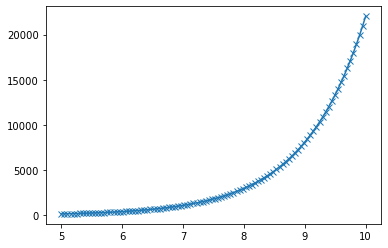

In [74]:
 # ! Tensor Arithematic operation & Visualization 
t1 = torch.tensor([1, 2])
t2 = torch.tensor([3, 4])
print(t1+t2)

dot_op = torch.dot(t1, t2)
dot_op

t1 = torch.randn(3, 2)
t2 = torch.randn(2, 3)
torch.matmul(t1, t2).size()

import matplotlib.pyplot as plt
x = torch.linspace(5, 10, 100) # (start, end, steps)
# print(x)
y = torch.exp(x)
plt.plot(x, y, '-x')

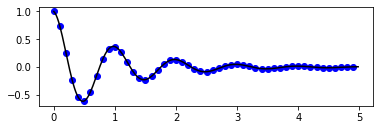

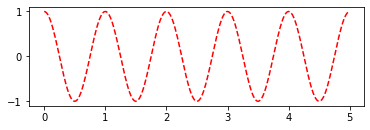

In [76]:
def f(t):
  return np.exp(-t)*np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t1_ = torch.from_numpy(t1)
t2_ = torch.from_numpy(t2)

plt.figure()
plt.subplot(211)
plt.plot(t1_, f(t1_), 'bo', t2_, f(t2_), 'k')

plt.figure()
plt.subplot(212)
plt.plot(t2_, np.cos(2*np.pi*t2), 'r--')

In [81]:
 # ! Gradient or AutoGrad
 # f(x) = 2x^2 + 3x + 1
 # f' = df/dx = 4x + 3
 # f'(5) = 23
 # by calling backward() to compute its gradient, and store it in the grad attribute

x = torch.tensor(5.0, requires_grad=True)
f = 2*x**2 + 3*x + 1
f.backward()
x.grad
x.type()

 # f(x, y) = 2x^2 + 3y^2 + 1
 # f' wrt x = df/dx = 4x  > @7 = 28
 # f' wrt y = df/dy = 6y  > @8 = 48
x = torch.tensor(7.0, requires_grad=True)
y = torch.tensor(8.0, requires_grad=True)

f = 2*x**2 + 3*y**2 + 1
f.backward()
x.grad
y.grad



tensor(48.)